In [1]:
%matplotlib inline

D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"



# Activations

This notebook shows how to use activation functions as activation within
layer or as activation functions.

In [2]:

import tensorflow as tf
tf.compat.v1.disable_eager_execution()

import matplotlib.pyplot as plt
from easy_mpl import plot
from ai4water.functional import Model
from ai4water.postprocessing import Visualize
from ai4water.utils.utils import get_version_info


import pandas as pd
import numpy as np


D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [3]:

for k,v in get_version_info().items():
    print(f"{k} version: {v}")

python version: 3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:20:16) [MSC v.1916 64 bit (AMD64)]
os version: nt
ai4water version: 1.06
lightgbm version: 3.3.1
tcn version: 3.4.0
catboost version: 0.26
xgboost version: 1.5.0
easy_mpl version: 0.21.2
SeqMetrics version: 1.3.3
tensorflow version: 2.7.0
keras.api._v2.keras version: 2.7.0
numpy version: 1.21.0
pandas version: 1.3.4
matplotlib version: 3.4.3
h5py version: 3.5.0
sklearn version: 1.0.1
shapefile version: 2.3.0
xarray version: 0.20.1
netCDF4 version: 1.5.7
optuna version: 2.10.1
skopt version: 0.9.0
hyperopt version: 0.2.7
plotly version: 5.3.1
lime version: NotDefined
seaborn version: 0.11.2


In [4]:
# create dummy data
i = np.linspace(-20, 20, 100)
o = i + 1
data = pd.DataFrame(np.concatenate([i.reshape(-1,1), o.reshape(-1, 1)], axis=1),
                    columns=['input', 'output'])

data.shape

(100, 2)

In [5]:
data.head()

,input,output
0,-20.000000,-19.000000
1,-19.595960,-18.595960
2,-19.191919,-18.191919
3,-18.787879,-17.787879
4,-18.383838,-17.383838


## activations as layers



In [6]:
# After 'Input' layer, all activations are used as tensorflow "Layer".

activation_layers = ['PReLU', "relu", "tanh", "ELU", "LeakyReLU",
                     "ThresholdedReLU", "selu", 'sigmoid', 'hardsigmoid', 'crelu',
            'relu6', 'softmax', 'softplus', 'softsign', "swish"]

layers = {
    "Input": {"config": {"shape": (1, ), "name": "CustomInputs"}},
    "PReLU": {"config": {},
              "inputs": "CustomInputs"},
    "relu": {"config": {},
              "inputs": "CustomInputs"},
    "tanh": {"config": {},
              "inputs": "CustomInputs"},
    "ELU": {"config": {},
              "inputs": "CustomInputs"},
    "LeakyReLU": {"config": {},
              "inputs": "CustomInputs"},
    "ThresholdedReLU": {"config": {},
              "inputs": "CustomInputs"},
    "selu": {"config": {},
              "inputs": "CustomInputs"},
    "sigmoid": {"config": {},
              "inputs": "CustomInputs"},
    "hardsigmoid": {"config": {},
              "inputs": "CustomInputs"},
    "crelu": {"config": {},
              "inputs": "CustomInputs"},
    "relu6": {"config": {},
              "inputs": "CustomInputs"},
    "softmax": {"config": {},
              "inputs": "CustomInputs"},
    "softplus": {"config": {},
              "inputs": "CustomInputs"},
    "softsign": {"config": {},
              "inputs": "CustomInputs"},
    "swish": {"config": {},
              "inputs": "CustomInputs"},
    "Concatenate": {"config": {},
               "inputs": activation_layers},
    "Dense": {"config": {"units": 1}},
          }

model = Model(model={'layers':layers},
            input_features = ['input'],
            output_features = ['output'],
            epochs=1,
            shuffle=False)


            building DL model for  
            regression problem using Model
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 CustomInputs (InputLayer)      [(None, 1)]          0           []                               
                                                                                                  
 PReLU (PReLU)                  (None, 1)            1           ['CustomInputs[0][0]']           
                                                                                                  
 relu (Activation)              (None, 1)            0           ['CustomInputs[0][0]']           
                                                                                                  
 tanh (Activation)              (None, 1)            0           ['CustomInputs[0][0]']           
              

In [7]:

vis = Visualize(model=model, save=False, show=True)

***** Training *****
input_x shape:  (56, 1)
target shape:  (56, 1)
***** Validation *****
input_x shape:  (14, 1)
target shape:  (14, 1)
***** Test *****
input_x shape:  (30, 1)
target shape:  (30, 1)
Plotting activations of layers


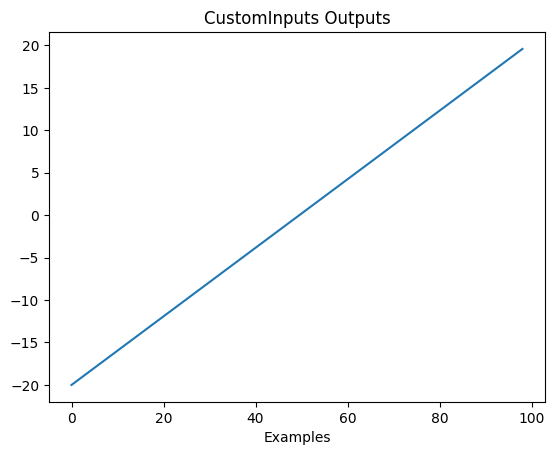

In [8]:

_ = vis.activations(layer_names="CustomInputs", data=data, data_type="all")

***** Training *****
input_x shape:  (56, 1)
target shape:  (56, 1)
***** Validation *****
input_x shape:  (14, 1)
target shape:  (14, 1)
***** Test *****
input_x shape:  (30, 1)
target shape:  (30, 1)
Plotting activations of layers


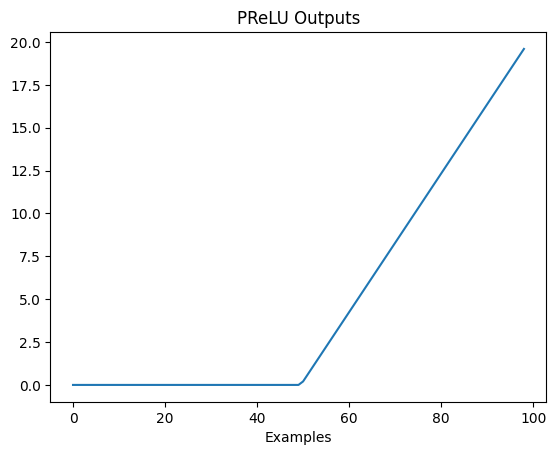

In [9]:
_ = vis.activations(layer_names="PReLU", data=data, data_type="all")

***** Training *****
input_x shape:  (56, 1)
target shape:  (56, 1)
***** Validation *****
input_x shape:  (14, 1)
target shape:  (14, 1)
***** Test *****
input_x shape:  (30, 1)
target shape:  (30, 1)
Plotting activations of layers


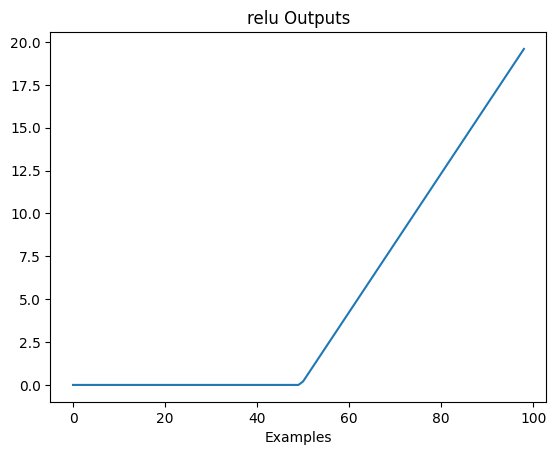

In [10]:
_ = vis.activations(layer_names="relu", data=data, data_type="all")

***** Training *****
input_x shape:  (56, 1)
target shape:  (56, 1)
***** Validation *****
input_x shape:  (14, 1)
target shape:  (14, 1)
***** Test *****
input_x shape:  (30, 1)
target shape:  (30, 1)
Plotting activations of layers


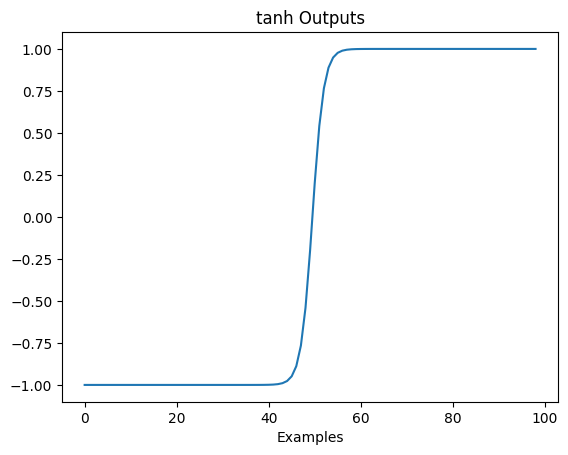

In [11]:
_ = vis.activations(layer_names="tanh", data=data, data_type="all")

***** Training *****
input_x shape:  (56, 1)
target shape:  (56, 1)
***** Validation *****
input_x shape:  (14, 1)
target shape:  (14, 1)
***** Test *****
input_x shape:  (30, 1)
target shape:  (30, 1)
Plotting activations of layers


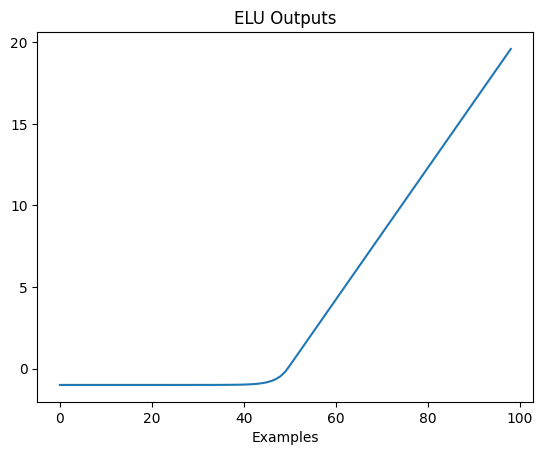

In [12]:
_ = vis.activations(layer_names="ELU", data=data, data_type="all")

In [13]:
_ = vis.activations(layer_names="LeakyReLU", data=data, data_type="all")

***** Training *****
input_x shape:  (56, 1)
target shape:  (56, 1)
***** Validation *****
input_x shape:  (14, 1)
target shape:  (14, 1)
***** Test *****
input_x shape:  (30, 1)
target shape:  (30, 1)
Plotting activations of layers


***** Training *****
input_x shape:  (56, 1)
target shape:  (56, 1)
***** Validation *****
input_x shape:  (14, 1)
target shape:  (14, 1)
***** Test *****
input_x shape:  (30, 1)
target shape:  (30, 1)
Plotting activations of layers


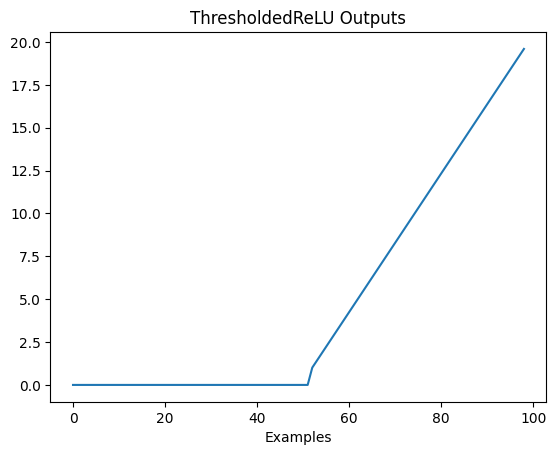

In [14]:
_ = vis.activations(layer_names="ThresholdedReLU", data=data, data_type="all")

***** Training *****
input_x shape:  (56, 1)
target shape:  (56, 1)
***** Validation *****
input_x shape:  (14, 1)
target shape:  (14, 1)
***** Test *****
input_x shape:  (30, 1)
target shape:  (30, 1)
Plotting activations of layers


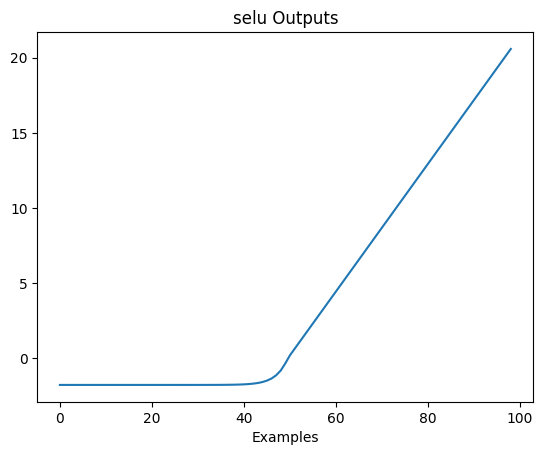

In [15]:
_ = vis.activations(layer_names="selu", data=data, data_type="all")

***** Training *****
input_x shape:  (56, 1)
target shape:  (56, 1)
***** Validation *****
input_x shape:  (14, 1)
target shape:  (14, 1)
***** Test *****
input_x shape:  (30, 1)
target shape:  (30, 1)
Plotting activations of layers


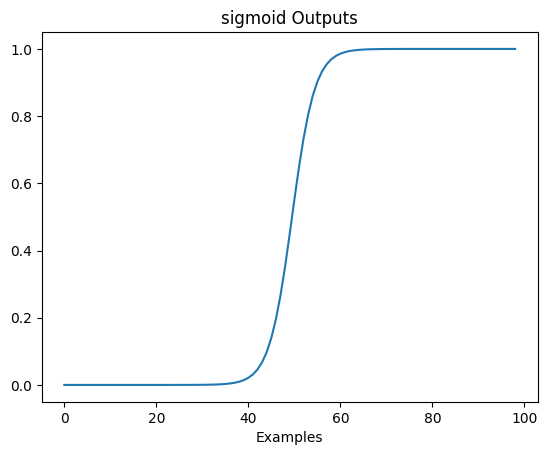

In [16]:
_ = vis.activations(layer_names="sigmoid", data=data, data_type="all")

***** Training *****
input_x shape:  (56, 1)
target shape:  (56, 1)
***** Validation *****
input_x shape:  (14, 1)
target shape:  (14, 1)
***** Test *****
input_x shape:  (30, 1)
target shape:  (30, 1)
Plotting activations of layers


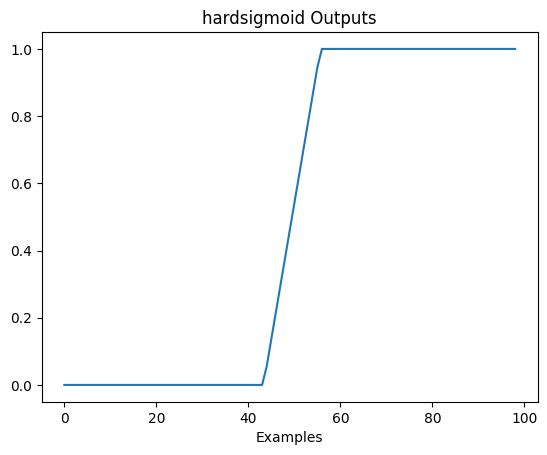

In [17]:
_ = vis.activations(layer_names="hardsigmoid", data=data, data_type="all")

***** Training *****
input_x shape:  (56, 1)
target shape:  (56, 1)
***** Validation *****
input_x shape:  (14, 1)
target shape:  (14, 1)
***** Test *****
input_x shape:  (30, 1)
target shape:  (30, 1)
Plotting activations of layers


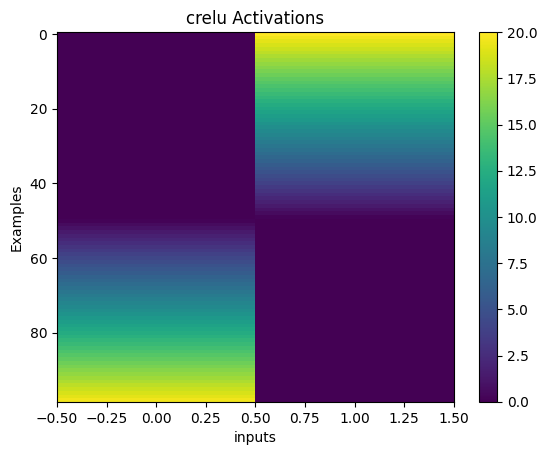

In [18]:
_ = vis.activations(layer_names="crelu", data=data, data_type="all")

***** Training *****
input_x shape:  (56, 1)
target shape:  (56, 1)
***** Validation *****
input_x shape:  (14, 1)
target shape:  (14, 1)
***** Test *****
input_x shape:  (30, 1)
target shape:  (30, 1)
Plotting activations of layers


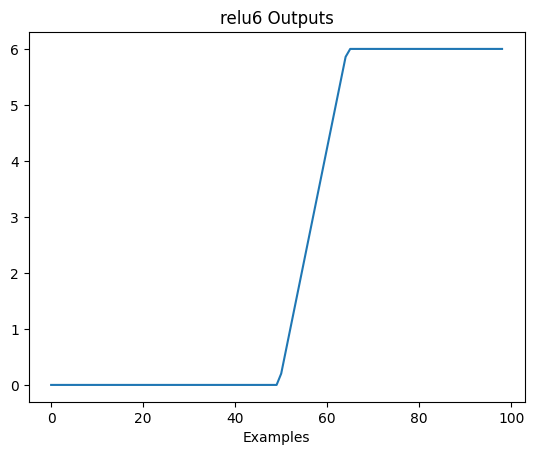

In [19]:
_ = vis.activations(layer_names="relu6", data=data, data_type="all")

***** Training *****
input_x shape:  (56, 1)
target shape:  (56, 1)
***** Validation *****
input_x shape:  (14, 1)
target shape:  (14, 1)
***** Test *****
input_x shape:  (30, 1)
target shape:  (30, 1)
Plotting activations of layers


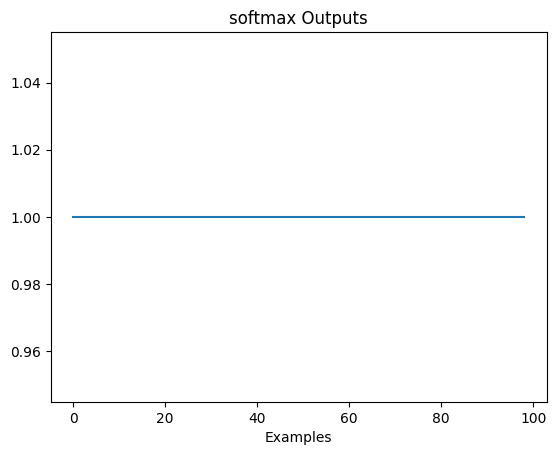

In [20]:
_ = vis.activations(layer_names="softmax", data=data, data_type="all")

***** Training *****
input_x shape:  (56, 1)
target shape:  (56, 1)
***** Validation *****
input_x shape:  (14, 1)
target shape:  (14, 1)
***** Test *****
input_x shape:  (30, 1)
target shape:  (30, 1)
Plotting activations of layers


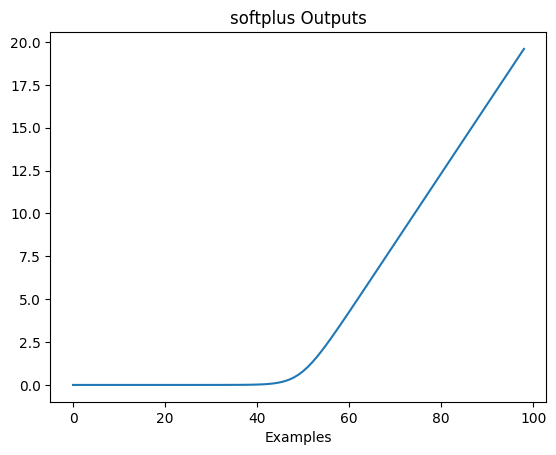

In [21]:
_ = vis.activations(layer_names="softplus", data=data, data_type="all")

***** Training *****
input_x shape:  (56, 1)
target shape:  (56, 1)
***** Validation *****
input_x shape:  (14, 1)
target shape:  (14, 1)
***** Test *****
input_x shape:  (30, 1)
target shape:  (30, 1)
Plotting activations of layers


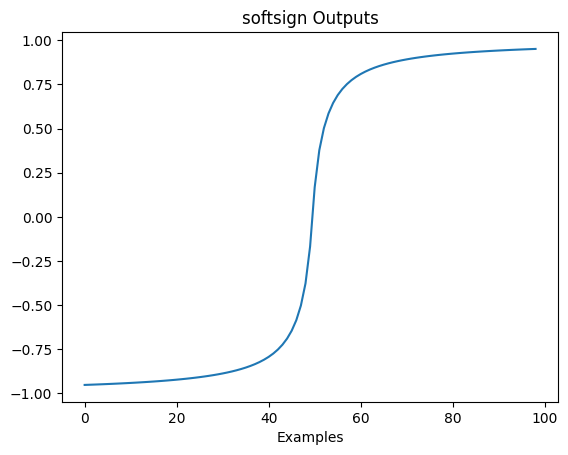

In [22]:
vis.activations(layer_names="softsign", data=data, data_type="all")

***** Training *****
input_x shape:  (56, 1)
target shape:  (56, 1)
***** Validation *****
input_x shape:  (14, 1)
target shape:  (14, 1)
***** Test *****
input_x shape:  (30, 1)
target shape:  (30, 1)
Plotting activations of layers


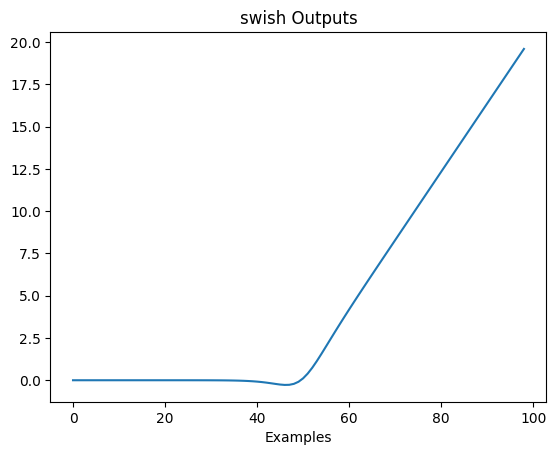

In [23]:
vis.activations(layer_names="swish", data=data, data_type="all")

## As activation functions within layers



In [24]:
layers = {"Input": {"config": {"shape": (1, ), "name": "CustomInputs"}}}

activation_layers = []
for idx, act_fn in enumerate(['tanh', 'relu', 'elu', 'leakyrelu', 'crelu', 'selu', 'relu6', 'sigmoid',
                              'hardsigmoid', 'swish']):

    # initializing the kernel/weight matrix of each dense layer with ones, so that it does not affect first forward propagation
    layers["Dense_" + act_fn] = {'config': {'units': 1, 'activation': act_fn, "kernel_initializer": "ones", "name": act_fn},
                                   'inputs': "CustomInputs"}
    activation_layers.append(act_fn)

layers["Concatenate"] = {"config": {"name": "concat"},
                    "inputs": activation_layers}

layers["Dense"] = {'config': {'units': 1}}



We are building a neural network with 10 dense/fully connected layers
each layer has a separate activation function. The name of the layer
is same as the activation function used in the layer.

In [25]:

model = Model(model={'layers':layers},
            input_features = ['input'],
            output_features = ['output'],
            epochs=1,
              shuffle=False)


            building DL model for  
            regression problem using Model
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 CustomInputs (InputLayer)      [(None, 1)]          0           []                               
                                                                                                  
 tanh (Dense)                   (None, 1)            2           ['CustomInputs[0][0]']           
                                                                                                  
 relu (Dense)                   (None, 1)            2           ['CustomInputs[0][0]']           
                                                                                                  
 elu (Dense)                    (None, 1)            2           ['CustomInputs[0][0]']           
              

In [26]:

vis = Visualize(model=model)


***** Training *****
input_x shape:  (56, 1)
target shape:  (56, 1)
***** Validation *****
input_x shape:  (14, 1)
target shape:  (14, 1)
***** Test *****
input_x shape:  (30, 1)
target shape:  (30, 1)
Plotting activations of layers


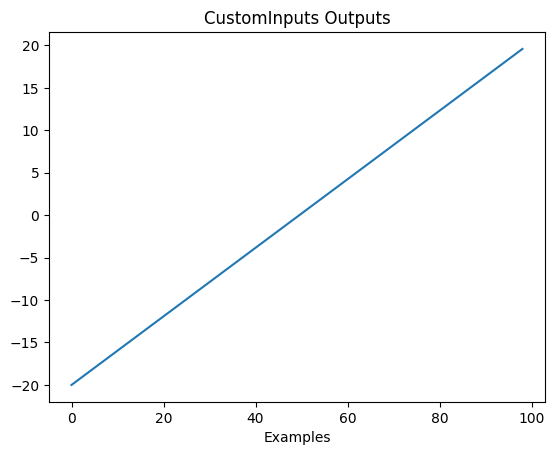

In [27]:

_ = vis.activations(layer_names="CustomInputs", data=data, data_type="all")


***** Training *****
input_x shape:  (56, 1)
target shape:  (56, 1)
***** Validation *****
input_x shape:  (14, 1)
target shape:  (14, 1)
***** Test *****
input_x shape:  (30, 1)
target shape:  (30, 1)
Plotting activations of layers


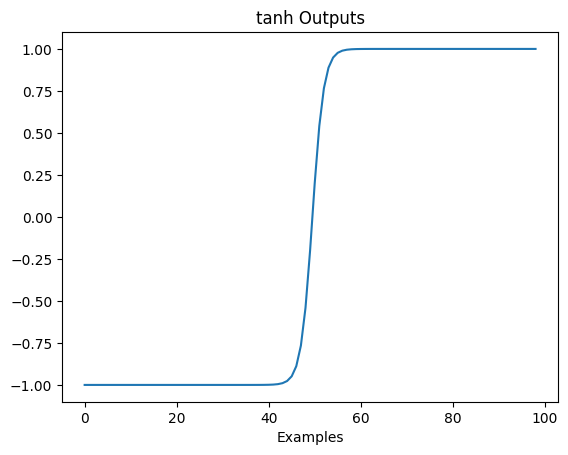

In [28]:
_ = vis.activations(layer_names=activation_layers[0], data=data, data_type="all")

***** Training *****
input_x shape:  (56, 1)
target shape:  (56, 1)
***** Validation *****
input_x shape:  (14, 1)
target shape:  (14, 1)
***** Test *****
input_x shape:  (30, 1)
target shape:  (30, 1)
Plotting activations of layers


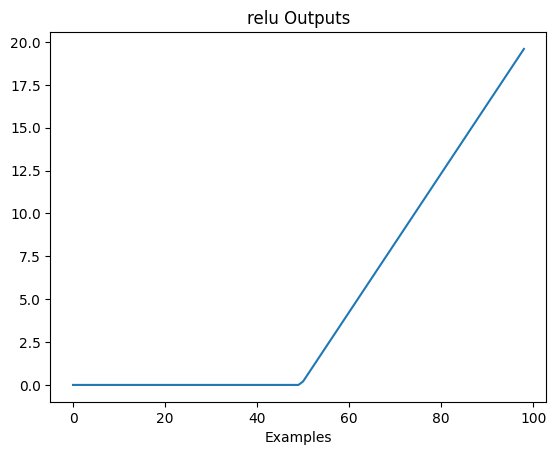

In [29]:
_ = vis.activations(layer_names=activation_layers[1], data=data, data_type="all")

***** Training *****
input_x shape:  (56, 1)
target shape:  (56, 1)
***** Validation *****
input_x shape:  (14, 1)
target shape:  (14, 1)
***** Test *****
input_x shape:  (30, 1)
target shape:  (30, 1)
Plotting activations of layers


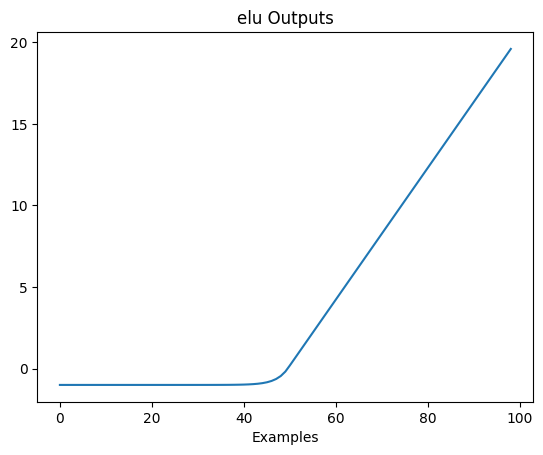

In [30]:
_ = vis.activations(layer_names=activation_layers[2], data=data, data_type="all")

***** Training *****
input_x shape:  (56, 1)
target shape:  (56, 1)
***** Validation *****
input_x shape:  (14, 1)
target shape:  (14, 1)
***** Test *****
input_x shape:  (30, 1)
target shape:  (30, 1)
Plotting activations of layers


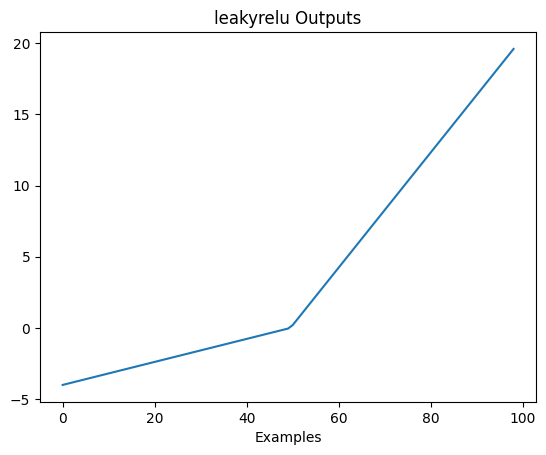

In [31]:
_ = vis.activations(layer_names=activation_layers[3], data=data, data_type="all")

***** Training *****
input_x shape:  (56, 1)
target shape:  (56, 1)
***** Validation *****
input_x shape:  (14, 1)
target shape:  (14, 1)
***** Test *****
input_x shape:  (30, 1)
target shape:  (30, 1)
Plotting activations of layers


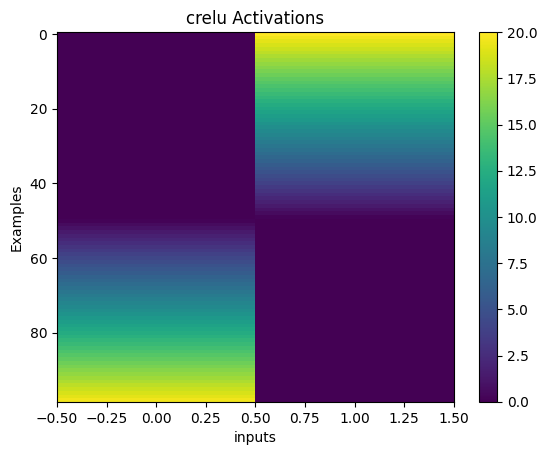

In [32]:
_ = vis.activations(layer_names=activation_layers[4], data=data, data_type="all")

***** Training *****
input_x shape:  (56, 1)
target shape:  (56, 1)
***** Validation *****
input_x shape:  (14, 1)
target shape:  (14, 1)
***** Test *****
input_x shape:  (30, 1)
target shape:  (30, 1)
Plotting activations of layers


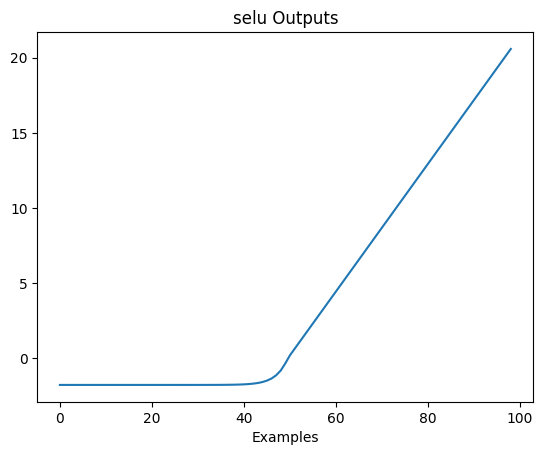

In [33]:
_ = vis.activations(layer_names=activation_layers[5], data=data, data_type="all")

***** Training *****
input_x shape:  (56, 1)
target shape:  (56, 1)
***** Validation *****
input_x shape:  (14, 1)
target shape:  (14, 1)
***** Test *****
input_x shape:  (30, 1)
target shape:  (30, 1)
Plotting activations of layers


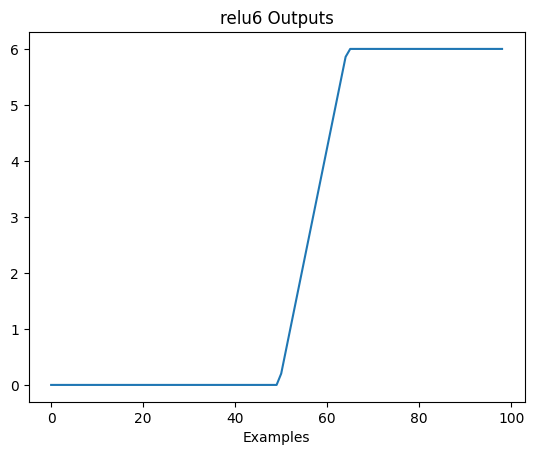

In [34]:
_ = vis.activations(layer_names=activation_layers[6], data=data, data_type="all")

***** Training *****
input_x shape:  (56, 1)
target shape:  (56, 1)
***** Validation *****
input_x shape:  (14, 1)
target shape:  (14, 1)
***** Test *****
input_x shape:  (30, 1)
target shape:  (30, 1)
Plotting activations of layers


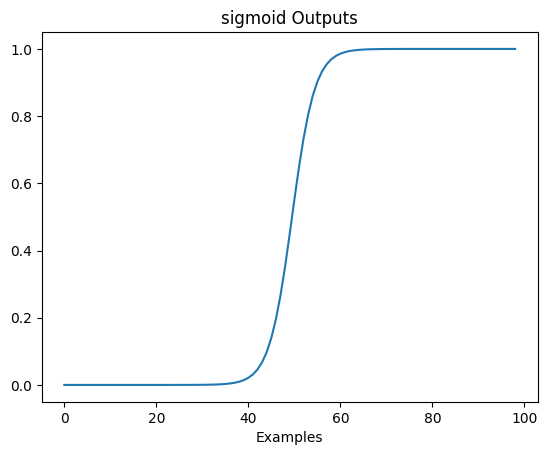

In [35]:
_ = vis.activations(layer_names=activation_layers[7], data=data, data_type="all")

***** Training *****
input_x shape:  (56, 1)
target shape:  (56, 1)
***** Validation *****
input_x shape:  (14, 1)
target shape:  (14, 1)
***** Test *****
input_x shape:  (30, 1)
target shape:  (30, 1)
Plotting activations of layers


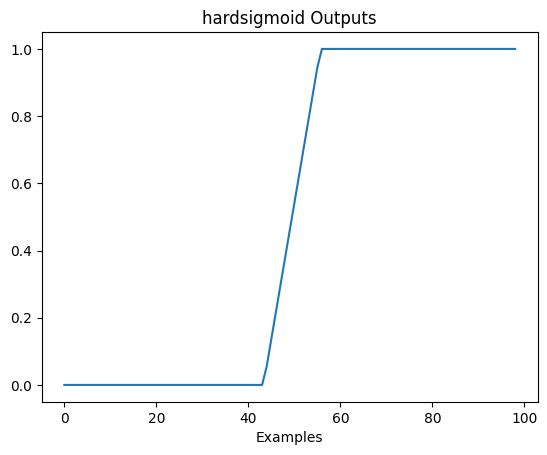

In [36]:
_ = vis.activations(layer_names=activation_layers[8], data=data, data_type="all")

***** Training *****
input_x shape:  (56, 1)
target shape:  (56, 1)
***** Validation *****
input_x shape:  (14, 1)
target shape:  (14, 1)
***** Test *****
input_x shape:  (30, 1)
target shape:  (30, 1)
Plotting activations of layers


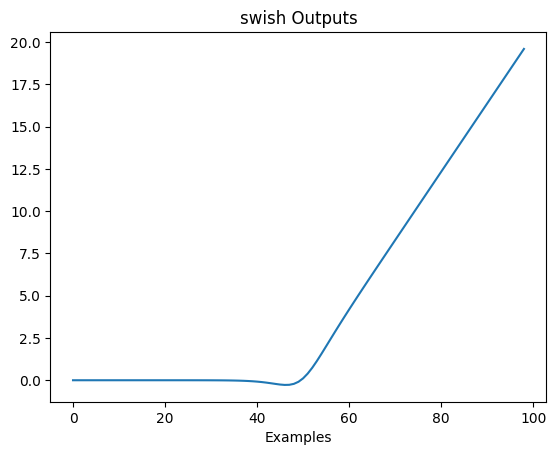

In [37]:
_ = vis.activations(layer_names=activation_layers[9], data=data, data_type="all")

In [38]:

activations = vis.get_activations(activation_layers, data=data, data_type="all")
activations.keys()

***** Training *****
input_x shape:  (56, 1)
target shape:  (56, 1)
***** Validation *****
input_x shape:  (14, 1)
target shape:  (14, 1)
***** Test *****
input_x shape:  (30, 1)
target shape:  (30, 1)


dict_keys(['tanh', 'relu', 'elu', 'leakyrelu', 'crelu', 'selu', 'relu6', 'sigmoid', 'hardsigmoid', 'swish'])

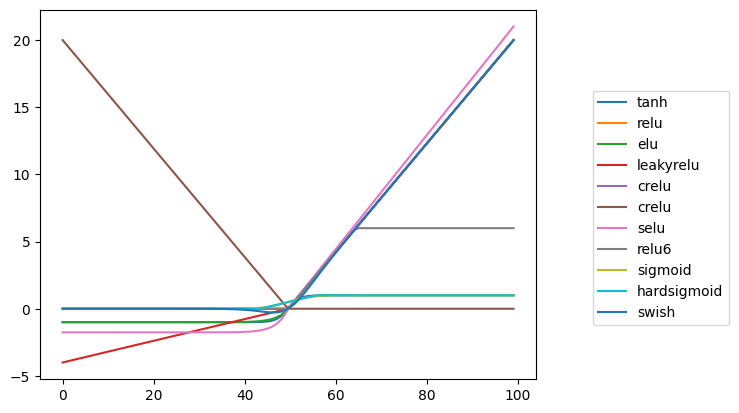

In [39]:

f, ax = plt.subplots()
for act, val in activations.items():
    plot(val, label=act, ax=ax, show=False)

plt.legend(bbox_to_anchor=(1.1, 0.8))
plt.show()